In [1]:
import pandas as pd
import numpy as np
from math import *
from random import *
import datetime as datetime
import matplotlib.pyplot as plt
import math
from numpy import unravel_index
from PointProcess import PointProcessTrain
from PointProcess import PointProcessRun

In [2]:
fields = ['XCOORD', 'YCOORD', 'CALL_TYPE_FINAL_D', 'CALL_TYPE_FINAL', 'DATE_TIME']
full_data = pd.read_csv('FixedLatLongTimeLoc_AndTimeSorted.csv', usecols=fields)

full_data['DATE_TIME'] =  pd.to_datetime(full_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.sort_values(by='DATE_TIME')
full_data.head()

,CALL_TYPE_FINAL,CALL_TYPE_FINAL_D,YCOORD,XCOORD,DATE_TIME
0,773A,UNCONSCIOUS PERS,39.824332,-86.236119,2006-12-28 04:45:48
1,774A,ASSAULT/TRAUMA,39.781627,-86.120826,2006-12-28 04:48:53
2,768A,SEIZURE,39.756840,-85.998714,2006-12-28 04:52:19
3,773A,UNCONSCIOUS PERS,39.782064,-86.044592,2006-12-28 05:10:57
4,790A,*MEDICAL ALARM,39.742415,-86.111559,2006-12-28 05:17:56


In [3]:
start = 300000
end = start + 2000
data = full_data[start:end]
data.reset_index(drop=True, inplace=True)

all_events = PointProcessTrain(data, xgridsize = 50, ygridsize = 50, w = [50, 1,.01], time_scale_label = 'days')

In [4]:
all_events.train()

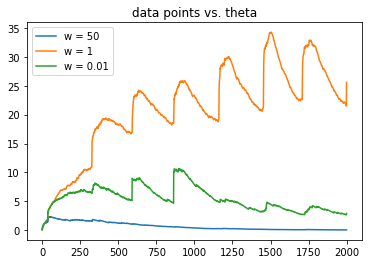


Hour vector: 
[0.02269107 0.01287048 0.01715526 0.01183926 0.01098546 0.00766475
 0.01087327 0.02538499 0.01803279 0.01734975 0.02882428 0.04824648
 0.03631042 0.04097157 0.02974109 0.05250755 0.0550569  0.07293048
 0.0599337  0.07860934 0.07584964 0.07517506 0.085281   0.1057154 ]
Day vector: 
[4.94328043e-26 2.04223038e-19 6.87208241e-13 3.29282183e-07
 9.49999671e-01 5.00000000e-02 4.09788042e-32]


In [5]:
all_events.param_examine()

In [6]:
test_points = full_data[end:end+200]
test_points.reset_index(drop=True, inplace=True)
all_events_simulate = PointProcessRun()
all_events_simulate.test_projection(test_points, num_hotspots = 40)

Predicting over time of 0.7859392605 days. Generating 76 intensity prediction(s)


AttributeError: 'PointProcessRun' object has no attribute '_K'